In [1]:
import numpy as np
import pandas as pd

In [2]:
#读取训练数据
train_data = pd.read_csv("kddcup_train_data", header=None)

In [3]:
#读取测试数据
test_data = pd.read_csv("kddcup_test_data", header=None)

In [4]:
#定义数据每一列的列名
col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
             "urgent","hot","num_failed_logins","logged_in","num_compromised",
             "root_shell","su_attempted","num_root","num_file_creations",
             "num_shells","num_access_files","num_outbound_cmds",
             "is_hot_login","is_guest_login","count","srv_count","serror_rate",
             "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

In [5]:
#添加列名
train_data.columns = col_names
test_data.columns = col_names

In [6]:
#把训练数据和测试数据拆分为: 训练数据特征（x_train）训练数据标签（y_train）测试数据特征（x_test）测试数据标签（y_test）
x_train = train_data.iloc[:,:train_data.shape[1]-1]
y_train = train_data.iloc[:,train_data.shape[1]-1:]

x_test = test_data.iloc[:,:test_data.shape[1]-1]
y_test = test_data.iloc[:,test_data.shape[1]-1:]

In [7]:
#将三个特征为单词的列做 "one hot" 转换
x_train_dummy = pd.get_dummies(x_train, columns=["protocol_type","service","flag"])
x_test_dummy = pd.get_dummies(x_test, columns=["protocol_type","service","flag"])

In [8]:
# 检查训练和测试数据集的列数是否一致
missing_cols = set(x_train_dummy.columns) - set(x_test_dummy.columns)
for c in missing_cols:
    print(c)
    x_test_dummy[c] = 0
    
# 确保列的顺序是一致的
x_test_dummy = x_test_dummy[x_train_dummy.columns]

#from IPython.display import display
#display(x_test_dummy.head(1))

service_red_i
service_urh_i


In [11]:
#训练并生成模型

import time
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_jobs=-1, random_state=3, n_estimators=102)
time_start = time.time()
model_random_forest = clf.fit(x_train_dummy, y_train.values.ravel())
print("training completed, using time %5.2f seconds" % (time.time()-time_start))

training completed, using time  9.47 seconds


In [12]:
#保存模型到本地

from sklearn.externals import joblib
model_name = "model_random_forest.sav"
joblib.dump(model_random_forest,model_name)

['model_random_forest.sav']

In [13]:
# 计算预测的准确率，分别用训练数据集和测试数据集
print("accuracy based on training: %5.4f" % model_random_forest.score(x_train_dummy, y_train))  

print("accuracy based on testing: %5.4f" % model_random_forest.score(x_test_dummy, y_test)) 

accuracy based on training: 1.0000
accuracy based on testing: 0.9280


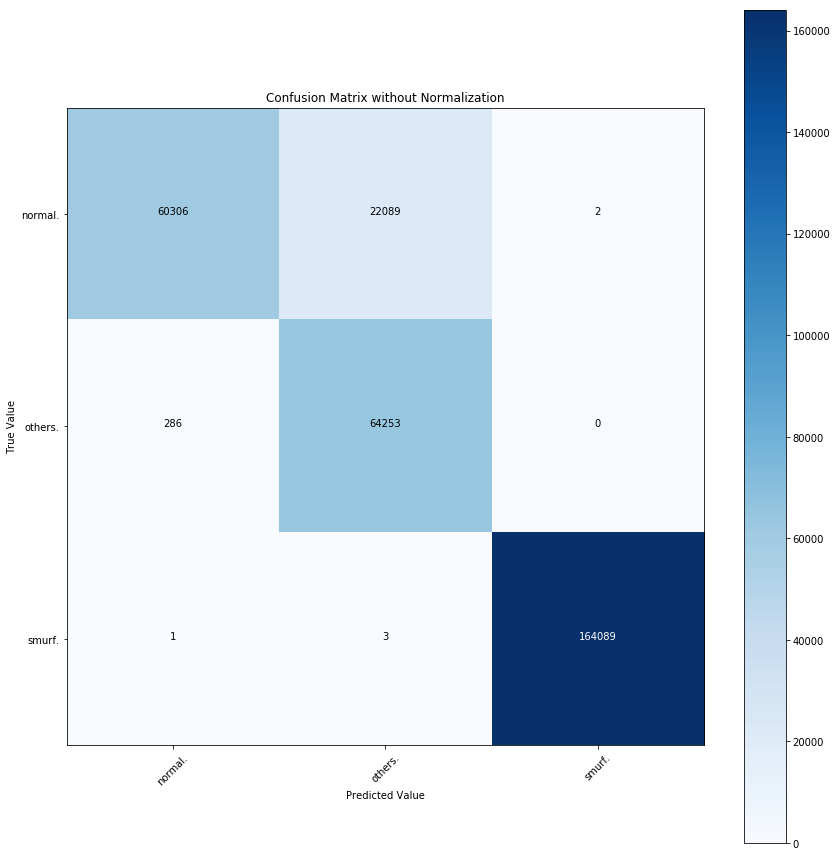

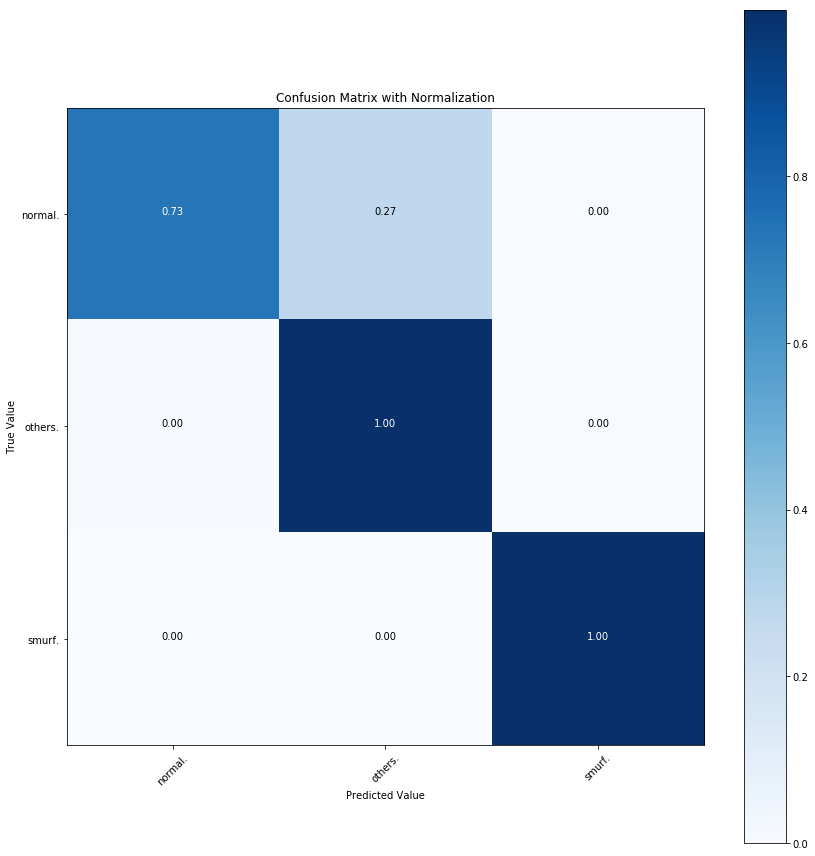

In [15]:
# 计算 Confusion Matrix 并生成图形

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import itertools

cnf_model_random_forest = confusion_matrix(model_random_forest.predict(x_test_dummy),y_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print("")
        #print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Value')
    plt.xlabel('Predicted Value')
    

import numpy as np
np.set_printoptions(precision=2)

width = 12
height = 12
plt.figure(figsize=(width, height))
plot_confusion_matrix(cnf_model_random_forest, classes=model_random_forest.classes_, title="Confusion Matrix without Normalization")

plt.figure(figsize=(width, height))
plot_confusion_matrix(cnf_model_random_forest, classes=model_random_forest.classes_, normalize=True, title="Confusion Matrix with Normalization")

plt.show()